In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf
from PIL import Image
import cv2

In [ ]:
!wget --no-check-certificate \
    "https://github.com/jtorresr1/IA_dataset_2/archive/refs/heads/main.zip" \
    -O "/tmp/imgs.zip"


zip_ref = zipfile.ZipFile('/tmp/imgs.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()


--2021-06-24 06:04:14--  https://github.com/jtorresr1/IA_dataset_2/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/jtorresr1/IA_dataset_2/zip/refs/heads/main [following]
--2021-06-24 06:04:14--  https://codeload.github.com/jtorresr1/IA_dataset_2/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/imgs.zip’

/tmp/imgs.zip           [      <=>           ]  27.26M  23.4MB/s    in 1.2s    

2021-06-24 06:04:15 (23.4 MB/s) - ‘/tmp/imgs.zip’ saved [28582336]



In [ ]:
# Cambiar el nombre a dataset desde archivos de Colab 
!ls /tmp/IA_dataset_2-main/dataset_mejorado

004_o_m_a_a.jpg  066_y_m_h_a.jpg  116_m_m_a_a.jpg  140_y_f_h_a.jpg
004_o_m_a_b.jpg  066_y_m_h_b.jpg  116_m_m_a_b.jpg  140_y_f_h_b.jpg
004_o_m_d_a.jpg  066_y_m_n_a.jpg  116_m_m_d_a.jpg  140_y_f_n_a.jpg
004_o_m_d_b.jpg  066_y_m_n_b.jpg  116_m_m_d_b.jpg  140_y_f_n_b.jpg
004_o_m_f_a.jpg  066_y_m_s_a.jpg  116_m_m_f_a.jpg  140_y_f_s_a.jpg
004_o_m_f_b.jpg  066_y_m_s_b.jpg  116_m_m_f_b.jpg  140_y_f_s_b.jpg
004_o_m_h_a.jpg  079_o_f_a_a.jpg  116_m_m_h_a.jpg  168_m_f_a_a.jpg
004_o_m_h_b.jpg  079_o_f_a_b.jpg  116_m_m_h_b.jpg  168_m_f_a_b.jpg
004_o_m_n_a.jpg  079_o_f_d_a.jpg  116_m_m_n_a.jpg  168_m_f_d_a.jpg
004_o_m_n_b.jpg  079_o_f_d_b.jpg  116_m_m_n_b.jpg  168_m_f_d_b.jpg
004_o_m_s_a.jpg  079_o_f_f_a.jpg  116_m_m_s_a.jpg  168_m_f_f_a.jpg
004_o_m_s_b.jpg  079_o_f_f_b.jpg  116_m_m_s_b.jpg  168_m_f_f_b.jpg
066_y_m_a_a.jpg  079_o_f_h_a.jpg  140_y_f_a_a.jpg  168_m_f_h_a.jpg
066_y_m_a_b.jpg  079_o_f_h_b.jpg  140_y_f_a_b.jpg  168_m_f_h_b.jpg
066_y_m_d_a.jpg  079_o_f_n_a.jpg  140_y_f_d_a.jpg  168_m_f_n_a

In [ ]:
!cd /tmp/IA_dataset_2-main/dataset_mejorado

In [ ]:
labels = ['angry', 'disgust', 'fear', 'happiness', 'neutrality', 'sadness']
labels_num = [0, 1, 2, 3, 4, 5]
tamx, tamy = 200, 320

In [ ]:
# modificar resize acorde de RAM
def etiquetar_images(images,labels, labels_num):
  solution_images = []
  solution_estado = []
  for nombre in images:
    word = nombre.split("_")
    for estado in range(len(labels)):
      if word[3] == labels[estado][0]:
        imagen = cv2.imread(nombre)
        imagen = tf.image.resize(imagen, [tamx, tamy])
        clases = np.array([0,0,0,0,0,0])
        solution_images.append(imagen)
        clases[labels_num[estado]] = 1
        solution_estado.append(clases)
        break    
  return np.array(solution_images), np.array(solution_estado)


Generación del dataset, y división de este(70 train-30 test)

In [ ]:
os.chdir('/tmp/IA_dataset_2-main/dataset_mejorado')

In [ ]:
X, y = etiquetar_images(os.listdir(), labels, labels_num)
# Probar con data augmentation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print(X_train[0].shape)

(200, 320, 3)


In [ ]:
for i in range(len(X_test)):
  X_test[i] = X_test[i] / 255.0

#X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
for i in range(len(X_train)):
  X_train[i] = X_train[i] / 255.0

In [ ]:
# Fallo por tema de RAM
'''
train_datagen = ImageDataGenerator(rescale = 1./255. , rotation_range = 40, width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,)                                
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow(X_train, y_train, batch_size = 1)   
validation_generator =  test_datagen.flow(X_test, y_test, batch_size=1)
'''

'\ntrain_datagen = ImageDataGenerator(rescale = 1./255. , rotation_range = 40, width_shift_range = 0.2,\n                                   height_shift_range = 0.2,\n                                   shear_range = 0.2,\n                                   zoom_range = 0.2,)                                \ntest_datagen = ImageDataGenerator( rescale = 1.0/255. )\ntrain_generator = train_datagen.flow(X_train, y_train, batch_size = 1)   \nvalidation_generator =  test_datagen.flow(X_test, y_test, batch_size=1)\n'

In [ ]:
pre_trained_model = tf.keras.applications.xception.Xception(input_shape = (tamx, tamy, 3), include_top = False) # , weights = 'imagenet'
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = Adam(learning_rate=0.0001), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['acc'])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 320, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 159, 32)  864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 159, 32)  128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 159, 32)  0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
print(y_train)
print(type(y_train))
print(X_train[0].shape)

[[1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]]
<class 'numpy.ndarray'>
(200, 320, 3)


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_test, y_test))

#history = model.fit_generator(X_train,epochs = 100)

Epoch 1/20
2/2 [==============================] - 10s 3s/step - loss: 2.2665 - acc: 0.2000 - val_loss: 2.8379 - val_acc: 0.1364
Epoch 2/20
2/2 [==============================] - 1s 556ms/step - loss: 1.5458 - acc: 0.5400 - val_loss: 2.1698 - val_acc: 0.0909
Epoch 3/20
2/2 [==============================] - 1s 554ms/step - loss: 0.4914 - acc: 0.9400 - val_loss: 2.1136 - val_acc: 0.0909
Epoch 4/20
2/2 [==============================] - 1s 554ms/step - loss: 0.2091 - acc: 0.9800 - val_loss: 2.0843 - val_acc: 0.4091
Epoch 5/20
2/2 [==============================] - 1s 560ms/step - loss: 0.1519 - acc: 0.9800 - val_loss: 2.1960 - val_acc: 0.3636
Epoch 6/20
2/2 [==============================] - 1s 589ms/step - loss: 0.1682 - acc: 1.0000 - val_loss: 2.4178 - val_acc: 0.3182
Epoch 7/20
2/2 [==============================] - 1s 542ms/step - loss: 0.0166 - acc: 1.0000 - val_loss: 2.7088 - val_acc: 0.3636
Epoch 8/20
2/2 [==============================] - 1s 559ms/step - loss: 0.0042 - acc: 1.0000

In [ ]:
# evaluate the model
accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

1/1 [==============================] - 0s 176ms/step - loss: 5.5399 - acc: 0.4091
Accuracy: 40.91


In [ ]:
print(history.history)

{'loss': [2.2664718627929688, 1.5457830429077148, 0.49137017130851746, 0.20905117690563202, 0.1519252061843872, 0.1682102084159851, 0.016630662605166435, 0.0042305574752390385, 0.0018627031240612268, 0.0010260222479701042, 0.001017920789308846, 0.0008069941541180015, 0.0001515543699497357, 0.00013820495223626494, 8.8880980911199e-05, 3.5378536267671734e-05, 5.778725244454108e-05, 1.910491664602887e-05, 1.5061815247463528e-05, 0.00046071840915828943], 'acc': [0.20000000298023224, 0.5400000214576721, 0.9399999976158142, 0.9800000190734863, 0.9800000190734863, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [2.8379175662994385, 2.1697630882263184, 2.1135637760162354, 2.0842549800872803, 2.1959776878356934, 2.4177651405334473, 2.708778142929077, 3.019223690032959, 3.340773820877075, 3.644497871398926, 3.9332871437072754, 4.205533027648926, 4.454824924468994, 4.667819023132324, 4.862527847290039, 5.043140888214111, 5.188224792480469, 5.324087142944336

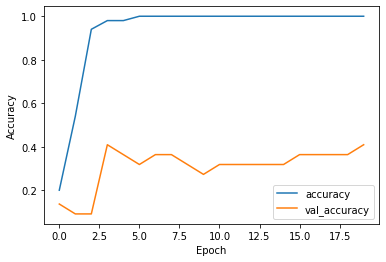

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
predictions = model.predict(X_test)
print(predictions)


[[1.73368864e-09 8.36890877e-07 5.19576259e-02 2.94867234e-04
  9.47674513e-01 7.21838733e-05]
 [1.43856860e-05 1.07320596e-03 4.31031615e-01 2.15398520e-01
  3.50136042e-01 2.34626769e-03]
 [2.28010776e-06 3.41098581e-04 7.21722958e-04 5.52417990e-03
  9.93206620e-01 2.04112104e-04]
 [5.87799009e-09 2.93925750e-05 1.34557411e-02 1.02333771e-03
  9.85291243e-01 2.00207549e-04]
 [1.28981919e-04 1.47868833e-03 6.22024992e-03 5.42625487e-01
  4.49341238e-01 2.05409029e-04]
 [1.06013133e-04 4.43047673e-01 3.78744467e-03 1.89549461e-01
  2.15357766e-01 1.48151726e-01]
 [8.88206841e-09 2.30306341e-05 4.52643908e-05 7.98636465e-04
  9.99076128e-01 5.69075055e-05]
 [2.47890464e-09 1.27577287e-05 1.43700480e-01 3.12579493e-03
  8.52750123e-01 4.10755543e-04]
 [9.72849250e-08 1.51593076e-05 4.28279070e-03 2.57672480e-04
  9.95404720e-01 3.95188981e-05]
 [4.50377702e-04 1.79462694e-03 6.64459832e-04 1.84164792e-02
  9.78123128e-01 5.50978468e-04]
 [4.25971029e-11 2.68770268e-08 9.65142902e-03 1.7

In [ ]:
y_ans = []
for pred in predictions:
  maximo = 0.000000000000000000000000000000000000000000000000000000000001
  pos = -1
  for i in range(len(pred)):
    if maximo < pred[i]:
      pos = i
      maximo = pred[i]
  y_ans.append(pos)

In [ ]:
print(y_ans)

[4, 2, 4, 4, 3, 1, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2]


In [ ]:
y_solve = []
for pred in y_test:
  maximo = 0.000000000000000000000000000000000000000000000000000000000001
  pos = -1
  for i in range(len(pred)):
    if maximo < pred[i]:
      pos = i
      maximo = pred[i]
  y_solve.append(pos)

In [ ]:
print(y_solve)

[4, 5, 3, 4, 3, 1, 5, 4, 2, 1, 2, 4, 2, 5, 4, 0, 0, 0, 0, 4, 1, 4]


In [ ]:
confusion = tf.math.confusion_matrix(labels=y_solve, predictions=y_ans, num_classes=6)

In [ ]:
print(confusion)

tf.Tensor(
[[0 0 0 0 4 0]
 [0 1 0 0 2 0]
 [0 0 1 0 2 0]
 [0 0 0 1 1 0]
 [0 0 1 0 6 0]
 [0 0 1 0 2 0]], shape=(6, 6), dtype=int32)


**Optimizador ADADELTA**

In [ ]:
pre_trained_model = tf.keras.applications.xception.Xception(input_shape = (tamx, tamy, 3), include_top = False) # , weights = 'imagenet'
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.0001), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['acc'])
print(model.summary())

83689472/83683744 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 320, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 159, 32)  864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 159, 32)  128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 159, 32)  0           block1_conv1_bn[0][0]            
_____________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
4/4 [==============================] - 39s 940ms/step - loss: 1.8588 - acc: 0.1600 - val_loss: 1.9728 - val_acc: 0.0909
Epoch 2/20
4/4 [==============================] - 1s 351ms/step - loss: 1.9781 - acc: 0.1200 - val_loss: 1.9556 - val_acc: 0.0909
Epoch 3/20
4/4 [==============================] - 1s 347ms/step - loss: 1.8454 - acc: 0.1400 - val_loss: 1.9448 - val_acc: 0.0909
Epoch 4/20
4/4 [==============================] - 1s 352ms/step - loss: 1.8095 - acc: 0.2000 - val_loss: 1.9488 - val_acc: 0.0909
Epoch 5/20
4/4 [==============================] - 1s 357ms/step - loss: 1.8819 - acc: 0.1200 - val_loss: 1.9572 - val_acc: 0.0909
Epoch 6/20
4/4 [==============================] - 1s 357ms/step - loss: 1.8124 - acc: 0.2200 - val_loss: 1.9700 - val_acc: 0.0909
Epoch 7/20
4/4 [==============================] - 2s 356ms/step - loss: 1.8326 - acc: 0.2400 - val_loss: 1.9942 - val_acc: 0.0909
Epoch 8/20
4/4 [==============================] - 2s 359ms/step - loss: 1.8604 - acc: 0.1

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

1/1 [==============================] - 1s 937ms/step - loss: 2.0036 - acc: 0.0909
Accuracy: 9.09


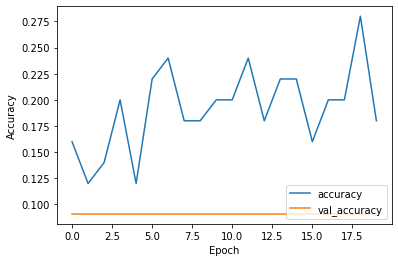

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
predictions = model.predict(X_test)
y_ans = []
for pred in predictions:
  maximo = 0.000000000000000000000000000000000000000000000000000000000001
  pos = -1
  for i in range(len(pred)):
    if maximo < pred[i]:
      pos = i
      maximo = pred[i]
  y_ans.append(pos)


y_solve = []
for pred in y_test:
  maximo = 0.000000000000000000000000000000000000000000000000000000000001
  pos = -1
  for i in range(len(pred)):
    if maximo < pred[i]:
      pos = i
      maximo = pred[i]
  y_solve.append(pos)

confusion = tf.math.confusion_matrix(labels=y_solve, predictions=y_ans, num_classes=6)
print(confusion)

tf.Tensor(
[[0 1 0 3 0 0]
 [0 0 0 3 0 0]
 [0 0 0 3 0 0]
 [0 0 0 2 0 0]
 [0 0 0 6 0 1]
 [0 0 0 3 0 0]], shape=(6, 6), dtype=int32)


**Optimizador ADAGRAD**

In [ ]:
pre_trained_model = tf.keras.applications.xception.Xception(input_shape = (tamx, tamy, 3), include_top = False) # , weights = 'imagenet'
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.0001), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['acc'])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 320, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 159, 32)  864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 159, 32)  128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 159, 32)  0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
4/4 [==============================] - 5s 570ms/step - loss: 2.0176 - acc: 0.1400 - val_loss: 1.9767 - val_acc: 0.0455
Epoch 2/20
4/4 [==============================] - 1s 345ms/step - loss: 1.6511 - acc: 0.2400 - val_loss: 1.9141 - val_acc: 0.0455
Epoch 3/20
4/4 [==============================] - 1s 345ms/step - loss: 1.5861 - acc: 0.4000 - val_loss: 2.0149 - val_acc: 0.0909
Epoch 4/20
4/4 [==============================] - 1s 344ms/step - loss: 1.4039 - acc: 0.4600 - val_loss: 1.9058 - val_acc: 0.0909
Epoch 5/20
4/4 [==============================] - 1s 346ms/step - loss: 1.2688 - acc: 0.6200 - val_loss: 1.9731 - val_acc: 0.0909
Epoch 6/20
4/4 [==============================] - 1s 351ms/step - loss: 1.2328 - acc: 0.6000 - val_loss: 1.9290 - val_acc: 0.0455
Epoch 7/20
4/4 [==============================] - 2s 360ms/step - loss: 1.0700 - acc: 0.7000 - val_loss: 1.9565 - val_acc: 0.0909
Epoch 8/20
4/4 [==============================] - 2s 351ms/step - loss: 0.9929 - acc: 0.80

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

1/1 [==============================] - 0s 166ms/step - loss: 1.6758 - acc: 0.3182
Accuracy: 31.82


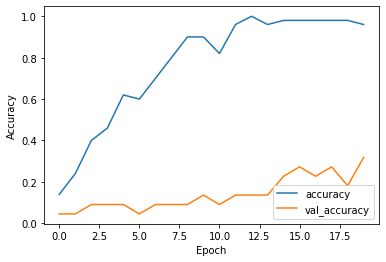

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
predictions = model.predict(X_test)
y_ans = []
for pred in predictions:
  maximo = 0.000000000000000000000000000000000000000000000000000000000001
  pos = -1
  for i in range(len(pred)):
    if maximo < pred[i]:
      pos = i
      maximo = pred[i]
  y_ans.append(pos)


y_solve = []
for pred in y_test:
  maximo = 0.000000000000000000000000000000000000000000000000000000000001
  pos = -1
  for i in range(len(pred)):
    if maximo < pred[i]:
      pos = i
      maximo = pred[i]
  y_solve.append(pos)

confusion = tf.math.confusion_matrix(labels=y_solve, predictions=y_ans, num_classes=6)
print(confusion)

tf.Tensor(
[[2 1 0 1 0 0]
 [0 1 0 0 2 0]
 [1 0 2 0 0 0]
 [1 0 0 1 0 0]
 [3 0 2 1 1 0]
 [0 0 2 0 1 0]], shape=(6, 6), dtype=int32)
